In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
# load iris dataset
iris = load_iris()


In [9]:
# convert to a pandas dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# add target column to dataframe
df['species'] = iris.target

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [16]:
# define x and y
X = iris.data
y = iris.target

In [17]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [18]:
# check the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)


In [19]:
# initialize the Naive Bayes Classifier
model = GaussianNB()

In [20]:
# train the model
model.fit(X_train, y_train)


GaussianNB()

In [21]:
# make predictions
y_pred = model.predict(X_test)

In [22]:
print(y_pred)

[2 1 1 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 1 2 1 0 2 0 0
 0 0 2 1 0 1 2 1]


In [29]:
# evaluate the model

# Acuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy is: {accuracy: .2f}")

# Classification report
report = classification_report(y_test, y_pred, target_names= iris.target_names)
print(f"Classification report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix is:")
print(cm)

Accuracy is:  0.91
Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

Confusion Matrix is:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


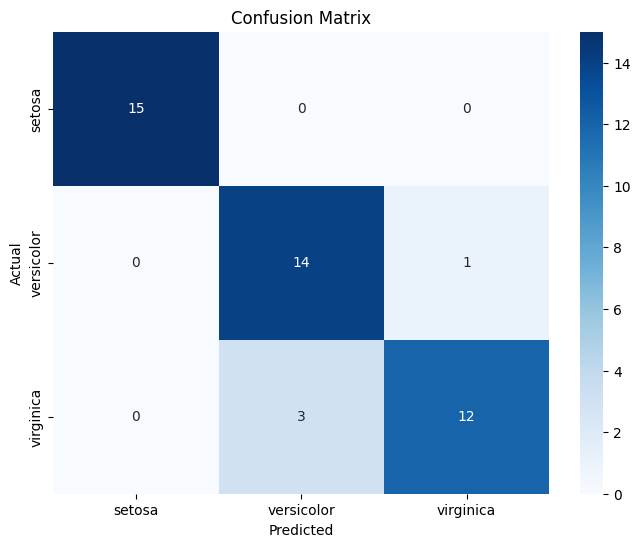

In [32]:
# visualize confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [33]:
# prediction of sample data
sample_data = [[5.1, 3.5, 1.4, 0.2]]
prediction = model.predict(sample_data)
print(f"\nPrediction for sample data: {iris.target_names[prediction[0]]}")


Prediction for sample data: setosa
